In [1]:
import scipy
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python

(6120, 3860, 3)


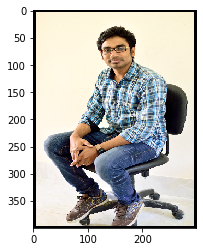

In [19]:
image=cv2.imread('shivazi.jpg',1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image=cv2.resize(image,(300,400))
plt.imshow(image)

In [20]:
image

array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)

In [23]:
start_point=50
end_point=200
def image_crop():
    final_temp=[]
    for i in range(50,150):
        temp=[]
        for j in range(50,200):
            temp.append(list(image[i][j]))
    final_temp.append(temp)

    cimage=np.asarray(final_temp)
    print(cimage)
    print(cimage.shape)
    plt.imshow(cimage)
    return cimage

[[[255 248 229]
  [255 248 229]
  [255 248 229]
  [255 248 229]
  [255 248 229]
  [255 248 230]
  [255 247 227]
  [254 248 230]
  [255 249 227]
  [255 248 230]
  [255 249 231]
  [254 248 226]
  [254 248 228]
  [255 249 227]
  [254 247 229]
  [255 248 229]
  [255 249 227]
  [255 249 227]
  [254 248 226]
  [254 248 226]
  [255 247 228]
  [253 247 225]
  [254 249 226]
  [255 247 226]
  [254 246 227]
  [254 246 225]
  [254 247 226]
  [254 246 222]
  [255 247 227]
  [255 247 226]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [254 248 226]
  [254 247 228]
  [254 248 226]
  [255 249 227]
  [254 248 226]
  [254 246 225]
  [255 248 228]
  [255 248 225]
  [254 248 226]
  [255 247 224]
  [255 248 230]
  [255 248 226]
  [255 249 227]
  [254 248 227]
  [255 249 227]
  [254 248 226]
  [255 250 228]
  [255 249 227]
  [255 249 227]
  [255 249 227]
  [255 248 229]
  [255 251 231]
  [255 249 227]
  [254 246 227]
  [168 2

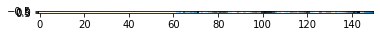

In [24]:
cimage=image_crop()

In [10]:
def get_channel(value):

    if value == 0:
        b = image.copy()
        # set green and red channels to 0
        b[:, :, 1] = 0
        b[:, :, 2] = 0
        
        return b
    
    elif value == 1:
        g = image.copy()
        # set blue and red channels to 0
        g[:, :, 0] = 0
        g[:, :, 2] = 0
        return g
    
    else:
        r = image.copy()
        # set blue and green channels to 0
        r[:, :, 0] = 0
        r[:, :, 1] = 0
        return r

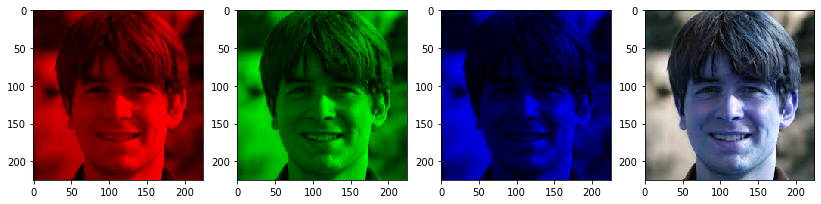

In [11]:
blue_img = get_channel(0)
green_img = get_channel(1)
red_img = get_channel(2)


plt.figure(figsize = (14,4))
plt.subplot(1, 4, 1)
plt.imshow(blue_img)
plt.subplot(1, 4, 2)
plt.imshow(green_img)
plt.subplot(1, 4, 3)
plt.imshow(red_img)
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [12]:
big_image=cv2.resize(image,(224,224))
image=cv2.resize(image,(10,10))
image.shape

(10, 10, 3)

In [13]:
# kernel=np.random.randint(5, size=(3,3))
# print(kernel)
kernel = np.zeros((3,3))
kernel[0][0] = -1
kernel[0][1] = -1
kernel[0][2] = -1

kernel[2][0] = 1
kernel[2][1] = 1
kernel[2][2] = 1

kernel

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

In [14]:
def conv3x3(image):
    
    n=len(image)

    final_list = []

    for i in range(1,n-1):
        conv_list = []
        for j in range(1,n-1):
            a = kernel[0][0]*image[i-1][j-1]
            b = kernel[0][1]*image[i-1][j]
            c = kernel[0][2]*image[i-1][j+1]

            d = kernel[1][0]*image[i][j-1]
            e = kernel[1][1]*image[i][j]
            f = kernel[1][2]*image[i][j+1]

            g = kernel[2][0]*image[i+1][j-1]
            h = kernel[2][1]*image[i+1][j]
            m = kernel[2][2]*image[i+1][j+1]

            total_sum = a+b+c+d+e+f+g+h+m
            conv_list.append(total_sum)

        final_list.append(conv_list)
    final_list = np.asarray(final_list)
    
    return final_list
    
         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (222, 222, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (220, 220, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (218, 218, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (216, 216, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (214, 214, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (212, 212, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (210, 210, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (208, 208, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (206, 206, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (204, 204, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (202, 202, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] Image shape:  (200, 200, 3)


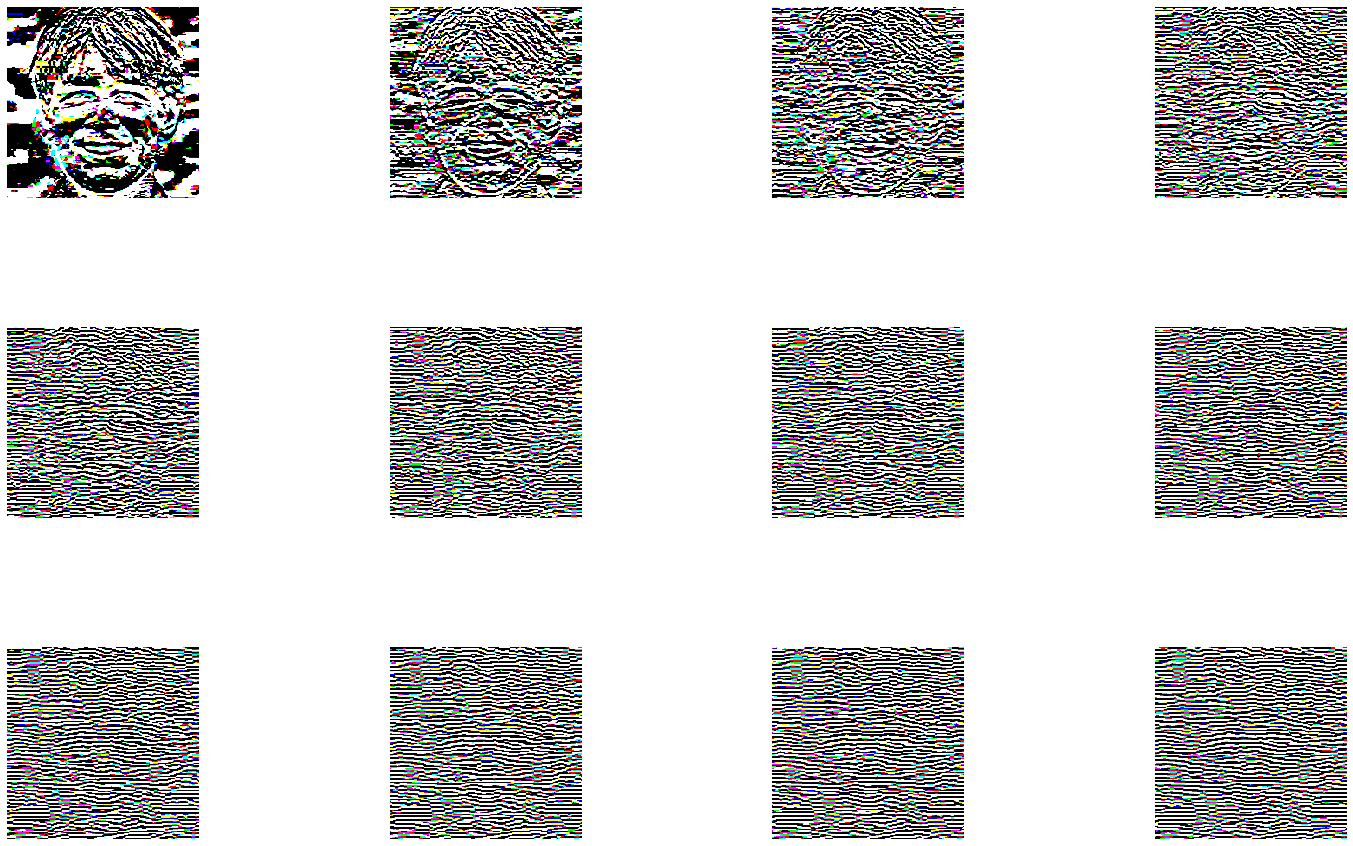

In [15]:
fig = plt.figure(figsize=(24,16))
fig.subplots_adjust(hspace=0.4, wspace=1)

rows = 3
cols = 4

for i in range(0,12):
    fig.add_subplot(rows, cols, i+1)
    
    if i == 0:
        conv_image = conv3x3(big_image)
    else:
        conv_image = conv3x3(conv_image) 
    print('[INFO] Image shape: ', conv_image.shape)
    plt.axis('off')
    plt.imshow(conv_image)

In [16]:
red = conv3x3(blue_img)
green = conv3x3(green_img)
blue = conv3x3(red_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(223, 223, 3)


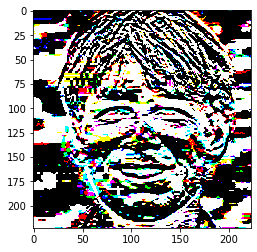

In [17]:
rgb = red + green + blue

plt.imshow(rgb)
print(rgb.shape)

(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(222, 222, 3)

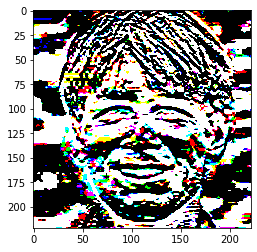

In [18]:
print(big_image.shape)
gh = conv3x3(big_image)
plt.imshow(gh)
gh.shape

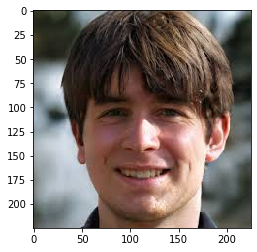

In [20]:
rgb=red_img+green_img+blue_img
plt.imshow(rgb)


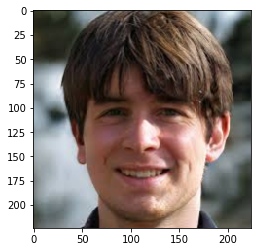

In [22]:
plt.imshow(big_image)

In [23]:
two=2*np.ones((6,6))

three=3*np.ones((2,2))
output=np.sum(three,axis=(1))
print(output)

[6. 6.]


In [24]:
# matrix = np.randomint.random((15,15))
matrix=np.random.randint(10, size=(3,3))
print(matrix)
np.sum(matrix, axis=(0,1))

[[5 4 5]
 [2 6 3]
 [4 8 2]]


39

In [25]:
import numpy as np

class Conv3x3:
    
# A Convolution layer using 3x3 filters.

    def __init__(self, num_filters):
        self.num_filters = num_filters

        # filters is a 3d array with dimensions (num_filters, 3, 3)
        # We divide by 9 to reduce the variance of our initial values
        self.filters = np.random.randn(num_filters, 3, 3) / 5
        print(self.filters)
        
    def iterate_regions(self, image):
        '''
        Generates all possible 3x3 image regions using valid padding.
        - image is a 2d numpy array
        '''
        h, w = image.shape

        for i in range(h - 2):
            for j in range(w - 2):
                im_region = image[i:(i + 3), j:(j + 3)]
                yield im_region, i, j
    
    def forward(self, input):
        '''
        Performs a forward pass of the conv layer using the given input.
        Returns a 3d numpy array with dimensions (h, w, num_filters).
        - input is a 2d numpy array
        '''
        h, w = input.shape
        output = np.zeros((h - 2, w - 2, self.num_filters))
        cnt=0
        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))
#             print(output[i,j])
            cnt+=1
            
        print(cnt)
        return output
    

In [26]:
import numpy as np
region=np.random.randint(8,size=(3,3,3))
print(region)
filters=np.random.randint(2,size=(3,3,3))
print(filters)
output= np.sum(region * filters, axis=(1, 2))
sum1=np.sum(region, axis=0)
sum2=np.sum(region, axis=1)
print(type(region), region.shape)
print(sum1,sum2)
print(output)

[[[0 7 3]
  [5 0 4]
  [4 7 1]]

 [[4 4 3]
  [0 1 7]
  [2 5 0]]

 [[2 2 7]
  [4 4 4]
  [5 3 6]]]
[[[1 0 0]
  [0 1 1]
  [1 0 1]]

 [[1 1 1]
  [1 0 0]
  [0 1 1]]

 [[0 0 1]
  [1 0 1]
  [1 1 1]]]
<class 'numpy.ndarray'> (3, 3, 3)
[[ 6 13 13]
 [ 9  5 15]
 [11 15  7]] [[ 9 14  8]
 [ 6 10 10]
 [11  9 17]]
[ 9 16 29]


In [27]:
import numpy as np
region=np.random.randint(5,size=(3,3,3))
print(region)
filters=np.random.randint(2,size=(3,3,3))
# print(filters)

# output= np.sum(region * filters, axis=(1, 2))
sum0=np.sum(region,axis=0)
sum1=np.sum(region, axis=1)
sum2=np.sum(region, axis=2)
print(sum0)
print(sum1)
print(sum2)
# print(type(region), region.shape)
# print(sum1,sum2)
# print(output)

[[[3 2 4]
  [1 0 1]
  [1 4 2]]

 [[2 0 3]
  [0 3 0]
  [2 0 2]]

 [[2 0 2]
  [3 4 0]
  [3 2 3]]]
[[7 2 9]
 [4 7 1]
 [6 6 7]]
[[5 6 7]
 [4 3 5]
 [8 6 5]]
[[9 2 7]
 [5 3 4]
 [4 7 8]]


In [28]:
>>> a = np.arange(12).reshape((3,2,2))
b= np.arange(12).reshape((3,2,2))
print(a)
# print(b)
sum0=np.sum(a,axis=0)
sum1=np.sum(a,axis=1)
sum2=np.sum(a,axis=2)
print(sum0)
print(sum1)
print(sum2)
sum12=np.sum(a, axis=(1,2))
print(sum12)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[12 15]
 [18 21]]
[[ 2  4]
 [10 12]
 [18 20]]
[[ 1  5]
 [ 9 13]
 [17 21]]
[ 6 22 38]


[[[ 0.19997547  0.1593109  -0.07316952]
  [ 0.31334002 -0.02190425 -0.00925784]
  [ 0.16806918  0.11700061  0.12004735]]

 [[ 0.17553938  0.38488715 -0.04559262]
  [-0.29782945 -0.05832682 -0.27363253]
  [ 0.10883275  0.05920392 -0.15224623]]

 [[ 0.03877694 -0.13467995 -0.20310532]
  [-0.34010759  0.1749784  -0.26874282]
  [-0.02243269 -0.04317196 -0.06376586]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


49729


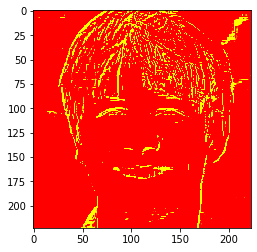

In [29]:
face=cv2.imread('download.jpeg',0)
# face=cv2.resize(face,(10,3))
plt.imshow(face)
c = Conv3x3(3)
output=c.forward(face)
plt.imshow(output)
plt.show()



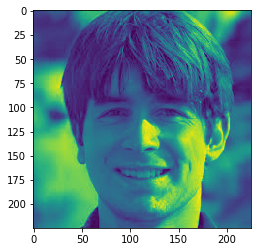

In [101]:
face=cv2.imread('download.jpeg',0)
plt.imshow(face)

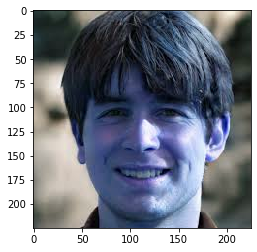

In [102]:
face=cv2.imread('download.jpeg',1)
plt.imshow(face)

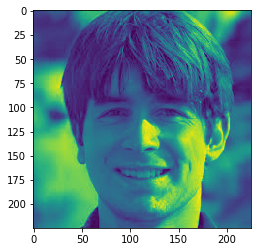

In [103]:
face=cv2.imread('download.jpeg',2)
plt.imshow(face)

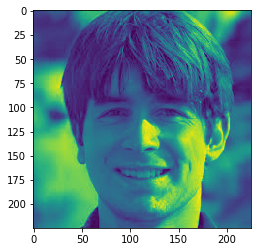

In [104]:
face=cv2.imread('download.jpeg',0)
plt.imshow(face)
c = Conv3x3(3)
output=c.forward(face)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(223, 223, 3)


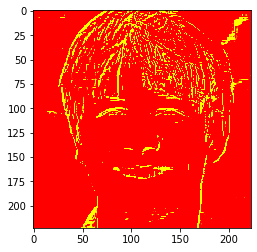

In [30]:
print(output.shape)
plt.imshow(output)